# Create Fruits Dataset
This notebook will demonstrate how to create a train/test/val split from the fruits dataset obtained from [Kaggle](https://www.kaggle.com/code/yerramvarun/fine-tuning-faster-rcnn-using-pytorch/input).

## Create the Train/Test/Validation Data Splits
The data ships with only a train and test folder.
There are 300 total labeled images in the entire dataset.
Inspecting the folders, we see that there are four different types of images: apples, bananas, oranges, and mixed.
The mixed images consist of a combination of different fruits.
The current split of the data set is an 80/20 split between training and testing data respectively; 240 training images and 60 testing images.
We will begin by moving the test images from the test directory back to the training directory.
Afterwards, we will get the counts of the number of images of each type of fruit.
Then we will create an even 80/10/10 split of the data for train/test/val respectively

### Define the data directory and ensure it exists

In [155]:
import os

data_dir = './data/fruits/'

# Verify that the data directory exists
dir_exists = f'{data_dir} exists: {os.path.exists(data_dir)}'
dir_exists

'./data/fruits/ exists: True'

## Move the files from the testing directory back to the training directory

In [156]:
train_dir = f'{data_dir}/train/'
test_dir = f'{data_dir}test/'

# Ensure the directories exist
assert os.path.exists(train_dir), 'Train directory does not exist'
assert os.path.exists(test_dir), 'Test directory does not exist'

test_files = os.listdir(test_dir)
test_files[:10]  # List the first 10 files of the test directory


['annotations.csv',
 'apple_88.jpg',
 'apple_88.xml',
 'apple_89.jpg',
 'apple_89.xml',
 'apple_9.jpg',
 'apple_9.xml',
 'apple_90.jpg',
 'apple_90.xml',
 'apple_91.jpg']

In [157]:
# Move the files from the test directory back to the training directory
import shutil

# Append the relative path to each file in the test directory
test_files_cur = [f'{test_dir}{f}' for f in test_files]
# Create a new path that each test file will be moved to
test_files_mv = [f'{train_dir}{f}' for f in test_files]

# Move the files from the test directory to the train directory
[shutil.move(curr, move) for curr, move in zip(test_files_cur, test_files_mv)]

['./data/fruits//train/annotations.csv',
 './data/fruits//train/apple_88.jpg',
 './data/fruits//train/apple_88.xml',
 './data/fruits//train/apple_89.jpg',
 './data/fruits//train/apple_89.xml',
 './data/fruits//train/apple_9.jpg',
 './data/fruits//train/apple_9.xml',
 './data/fruits//train/apple_90.jpg',
 './data/fruits//train/apple_90.xml',
 './data/fruits//train/apple_91.jpg',
 './data/fruits//train/apple_91.xml',
 './data/fruits//train/apple_92.jpg',
 './data/fruits//train/apple_92.xml',
 './data/fruits//train/apple_93.jpg',
 './data/fruits//train/apple_93.xml',
 './data/fruits//train/apple_94.jpg',
 './data/fruits//train/apple_94.xml',
 './data/fruits//train/apple_95.jpg',
 './data/fruits//train/apple_95.xml',
 './data/fruits//train/banana_87.jpg',
 './data/fruits//train/banana_87.xml',
 './data/fruits//train/banana_88.jpg',
 './data/fruits//train/banana_88.xml',
 './data/fruits//train/banana_89.jpg',
 './data/fruits//train/banana_89.xml',
 './data/fruits//train/banana_9.jpg',
 './d

In [158]:
# Get the counts of each object class. We will need to copy both the .jpg and .xml files to our valid/ dir
train_files = os.listdir(train_dir)
num_apples = int(sum('apple' in f for f in train_files)/2)
num_bananas = int(sum('banana' in f for f in train_files)/2)
num_oranges = int(sum('orange' in f for f in train_files)/2)
num_mixed = int(sum('mixed' in f for f in train_files)/2)
num_apples, num_bananas, num_oranges, num_mixed

(77, 74, 73, 21)

## Create a Train/Test/Val split of our data
We can see above that there are 94 images of apples, 91 images of bananas, 90 images of oranges, and 25 images of mixed fruit.

We will be taking 10% of each type of fruit image for validation, 10% for testing, and the remaining 80% will be used as our training data.

In [159]:
# Get the file names without extension. Each .jpg file has a corresponding .xml file with the annotations.
filenames = [os.path.splitext(f)[0] for f in train_files if f.lower().endswith('.jpg')]

# Create an array of each type of fruit image
apple_files = [f for f in filenames if 'apple' in f]
banana_files = [f for f in filenames if 'banana' in f]
orange_files = [f for f in filenames if 'orange' in f]
mixed_files = [f for f in filenames if 'mixed' in f]

In [160]:
# Convert each list to a numpy.ndarray
import numpy as np

apple_files = np.array(apple_files)
banana_files = np.array(banana_files)
orange_files = np.array(orange_files)
mixed_files = np.array(mixed_files)

In [161]:
# Take a split of the data using the Numpy library
ap_len = len(apple_files) # Total number of apples files
ba_len = len(banana_files) # Total number of banana files
or_len = len(orange_files) # Total number of orange files
mi_len = len(mixed_files) # Total number of mixed files

splits = [0.8, 0.1, 0.1]  # The percentages for our splits (train/test/val)
train_r, test_r, val_r = splits
assert(np.sum(splits) == 1.0), "Split probabilities must sum to 1.0"

ap_split_indices = [int(ap_len*train_r), int(ap_len*(train_r+val_r))]
ap_train, ap_val, ap_test = np.split(apple_files, ap_split_indices)

ba_split_indices = [int(ba_len*train_r), int(ba_len*(train_r+val_r))]
ba_train, ba_val, ba_test = np.split(banana_files, ba_split_indices)

or_split_indices = [int(or_len*train_r), int(or_len*(train_r+val_r))]
or_train, or_val, or_test = np.split(orange_files, or_split_indices)

mi_split_indices = [int(mi_len*train_r), int(mi_len*(train_r+val_r))]
mi_train, mi_val, mi_test = np.split(mixed_files, mi_split_indices)

In [162]:
# Inspect the counts of the train/test/val splits for each object type
import pandas as pd
counts = {'Apple_Train': [ap_train.shape[0]], 'Apple_Val': [ap_val.shape[0]], 'Apple_Test': [ap_val.shape[0]],
          'Banana_Train': [ba_train.shape[0]], 'Banana_Val': [ba_val.shape[0]],
          'Banana_Test': [ba_test.shape[0]], 'Orange_Train': [or_train.shape[0]],
          'Orange_Val': [or_val.shape[0]], 'Orange_Test': [or_test.shape[0]],
          'Mixed_Train': [mi_train.shape[0]], 'Mixed_Val': [mi_val.shape[0]],
          'Mixed_Test': [mi_test.shape[0]]}
counts_df = pd.DataFrame.from_dict(counts)
counts_df

,Apple_Train,Apple_Val,Apple_Test,Banana_Train,Banana_Val,Banana_Test,Orange_Train,Orange_Val,Orange_Test,Mixed_Train,Mixed_Val,Mixed_Test
0,61,8,8,59,7,8,58,7,8,16,2,3


## Move the Newly Created Data Splits to the Corresponding Directories
We can see above we have an 80/10/10 percentage split of each of the types of fruit.
Now we need to move the files from the training directory to the validation and testing directory.

In [163]:
# Redefining the train/val/test directories
train_dir = f'{data_dir}train/'
val_dir = f'{data_dir}valid/'
test_dir = f'{data_dir}test/'

# Ensure that the validation directory exists. We already know our testing directory exists
if not os.path.isdir(val_dir):
    os.makedirs(val_dir)

# Convert the numpy split arrays back into a python list
apple_train = ap_train.tolist()
apple_val = ap_val.tolist()
apple_test = ap_test.tolist()
banana_train = ba_train.tolist()
banana_val = ba_val.tolist()
banana_test = ba_test.tolist()
orange_train = or_train.tolist()
orange_val = or_val.tolist()
orange_test = or_test.tolist()
mixed_train = mi_train.tolist()
mixed_val = mi_val.tolist()
mixed_test = mi_test.tolist()

In [164]:
# Now we must grab each .jpg and .xml file from the train directory and move it to the val or test directory
# We do not need to move the training files.
# We will define a function that will take in a source directory, destination directory, and list of
# filenames to move
def mv_files(source_dir, dest_dir, files):
    source_files_jpg = [f'{source_dir}{f}.jpg' for f in files]
    dest_files_jpg = [f'{dest_dir}{f}.jpg' for f in files]
    source_files_xml = [f'{source_dir}{f}.xml' for f in files]
    dest_files_xml = [f'{dest_dir}{f}.xml' for f in files]
    # Move the .jpg files
    [shutil.move(curr, mv) for curr, mv in zip(source_files_jpg, dest_files_jpg)]
    # Move the .xml files
    [shutil.move(curr, mv) for curr, mv in zip(source_files_xml, dest_files_xml)]

train_dir = f'{data_dir}train/'
val_dir = f'{data_dir}valid/'
test_dir = f'{data_dir}/test/'

# Move the validation files to the validation directory
mv_files(train_dir, val_dir, apple_val)
mv_files(train_dir, val_dir, banana_val)
mv_files(train_dir, val_dir, orange_val)
mv_files(train_dir, val_dir, mixed_val)
# Move the test files to the test directory
mv_files(train_dir, test_dir, apple_test)
mv_files(train_dir, test_dir, banana_test)
mv_files(train_dir, test_dir, orange_test)
mv_files(train_dir, test_dir, mixed_test)

# Create CSV Annotation Files
Now that we have our train/test/split datasets, we need to create a single annotation file for each folder

The fruits dataset ships with a .xml file corresponding to each image file which contains annotations.
Ideally, we would have a single annotation file to pass to our PyTorch DataSet class (more later) to work with.
As such, we are going to read each of the .xml files and create a Pandas dataframe for the training, testing and
validation data in each respective folder.
This dataframe can be written to a CSV file and queried much like a SQL database.
When working with our PyTorch DataSet class, the CSV file will make our lives a lot easier.

In [165]:
# We'll use xmltodict to parse the xml files into a dictionary
import xmltodict

# Let's take a look at an example of a parsed XML file
xml_f = f'{train_dir}mixed_1.xml'
with open(xml_f, encoding='utf-8') as f:
    data_dict = xmltodict.parse(f.read())
data_dict['annotation']['object']


[{'name': 'orange',
  'pose': 'Unspecified',
  'truncated': '0',
  'difficult': '0',
  'bndbox': {'xmin': '221', 'ymin': '83', 'xmax': '463', 'ymax': '338'}},
 {'name': 'apple',
  'pose': 'Unspecified',
  'truncated': '0',
  'difficult': '0',
  'bndbox': {'xmin': '440', 'ymin': '148', 'xmax': '666', 'ymax': '404'}},
 {'name': 'banana',
  'pose': 'Unspecified',
  'truncated': '0',
  'difficult': '0',
  'bndbox': {'xmin': '54', 'ymin': '228', 'xmax': '627', 'ymax': '528'}}]

### XML Fields
Above we can see that the XML files contain a lot of information.
We are not concerned with the `path`, `folder`, `source`, `size`, `segmented`, `truncated`, or `difficult` fields.
Specifically for each object we want to retain the following fields in a dictionary object of the form:
```
{
    filename: 'fname.jpg'
    label: 'cls_label' # One of (apple, banana, orange); the "name" field from the XML "object" object
    box: [x0,y0,x1,y1] # The set of points the comprise the bounding box
}
```
Below we will create a function that will process each directory and then create our annotation files.
Looking at the structure above, we can see that all results are stored in `data_dict["annotation"]` and
the specific object labels/boxes are stored in `data_dict["annotation"]["object"]`.

In [166]:
def parse_xml_files(input_dir):
    # We will store an array of dictionaries to return. These will be used to create a dataframe
    results = []
    filepaths = [os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.lower().endswith('.xml')]
    for f in filepaths:
        with open(f, encoding='utf-8') as xml:
            data = xmltodict.parse(xml.read())
        # Grab the fields we wish to store from the data dictionary
        data_dict = data['annotation']
        fname = data_dict['filename']
        fruits = data_dict['object']
        # There are two scenarios here:
        # 1. There is only one fruit in the image, in which case type(fruits) is a dict object
        # 2. There are multiple fruits in the image, in which case type(fruits) is a list
        # We will handle both cases
        if type(fruits) is dict:
            # Only one fruit
            res = {'filename': fname, 'label': fruits['name']}
            bndbox = fruits['bndbox'] # Extract the bounding box from the xml dict
            x0, y0, x1, y1 = bndbox['xmin'], bndbox['ymin'], bndbox['xmax'], bndbox['ymax']
            res['box'] = [x0,y0,x1,y1]
            results.append(res)
        elif type(fruits) is list:
            # Multiple fruits
            for fruit in fruits:
                res = {'filename': fname, 'label': fruit['name']}
                bndbox = fruit['bndbox']
                x0, y0, x1, y1 = bndbox['xmin'], bndbox['ymin'], bndbox['xmax'], bndbox['ymax']
                res['box'] = [x0,y0,x1,y1]
                results.append(res)
    return results

# Redefine all of our directories
data_dir = './data/fruits/'
train_dir = f'{data_dir}train/'
val_dir = f'{data_dir}valid/'
test_dir = f'{data_dir}test/'

# Process train/val/test directories' XML files to get the information we wish to retain
train_dict = parse_xml_files(train_dir)
val_dict = parse_xml_files(val_dir)
test_dict = parse_xml_files(test_dir)

# Create dataframes out of the results dictionary
train_df = pd.DataFrame.from_dict(train_dict)
val_df = pd.DataFrame.from_dict(val_dict)
test_df = pd.DataFrame.from_dict(test_dict)

### Inspect the resultant data frames

In [167]:
train_df.head()

,filename,label,box
0,apple_1.jpg,apple,"[8, 15, 331, 349]"
1,apple_10.jpg,apple,"[56, 99, 1413, 1419]"
2,apple_11.jpg,apple,"[213, 33, 459, 258]"
3,apple_11.jpg,apple,"[1, 30, 188, 280]"
4,apple_11.jpg,apple,"[116, 5, 337, 220]"


In [168]:
val_df.head()

,filename,label,box
0,apple_66.jpg,apple,"[46, 59, 397, 432]"
1,apple_66.jpg,apple,"[363, 83, 770, 514]"
2,apple_67.jpg,apple,"[291, 55, 588, 342]"
3,apple_68.jpg,apple,"[397, 213, 961, 793]"
4,apple_68.jpg,apple,"[78, 176, 590, 665]"


In [169]:
test_df.head()

,filename,label,box
0,apple_89.jpg,apple,"[19, 68, 278, 343]"
1,apple_9.jpg,apple,"[184, 110, 582, 525]"
2,apple_90.jpg,apple,"[58, 124, 1776, 1910]"
3,apple_91.jpg,apple,"[227, 62, 723, 500]"
4,apple_92.jpg,apple,"[77, 74, 540, 518]"


### Store our data out to the appropriate directories
Now that we have a single annotation file for our train/test/val images, we can store this single file and delete all the xml files with annotations if we so desire.
We won't delete them in this notebook in case we want to use some of the other fields later

In [170]:
train_file = f'{train_dir}annotations.csv'
val_file = f'{val_dir}annotations.csv'
test_file = f'{test_dir}annotations.csv'

train_df.to_csv(train_file, header=True, index=False, encoding='utf-8')
val_df.to_csv(val_file, header=True, index=False, encoding='utf-8')
test_df.to_csv(test_file, header=True, index=False, encoding='utf-8')

# Inspect our new data set with annotations
Let's use the OpenCV library to load up an image.
Then we can use Pandas to get the corresponding rows for the image from the annotation dataframe.
Finally, we can visualize the bounding boxes and labels using the OpenCV library.

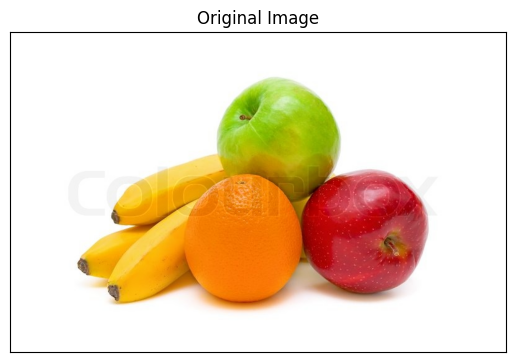

In [171]:
import cv2
from matplotlib import pyplot as plt

# Let's load up an image with multiple annotations for inspection
img_path = './data/fruits/test/mixed_7.jpg'

cv_img = cv2.imread(img_path, cv2.IMREAD_COLOR)
# OpenCV stores colors as BGR but Matplotlib expects RGB. Convert the colors
img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])  # Hide the tick marks on our graph
plt.show()

In [172]:
# Load the annotation file and pull the corresponding rows for the image
import pandas as pd
annotation_file = './data/fruits/test/annotations.csv'
annotation_df = pd.read_csv(annotation_file, encoding='utf-8')
annotation_df.head()
# Locate the row(s) that correspond to our image
rois = annotation_df.loc[annotation_df['filename'] == 'mixed_7.jpg']
rois.head()

,filename,label,box
26,mixed_7.jpg,orange,"['262', '231', '485', '445']"
27,mixed_7.jpg,apple,"['463', '223', '690', '434']"
28,mixed_7.jpg,banana,"['154', '258', '510', '455']"


orange
apple
banana


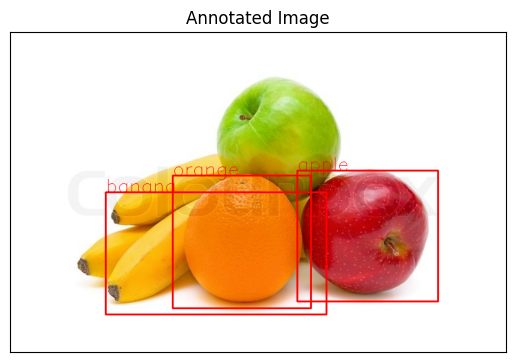

In [173]:
# We will need to use the ast library to load the bounding boxes from the dataframe.
# In CSV, the list of boxes is represented as a list of strings
import ast

# Now we can use OpenCV to annotate our images with a bounding box and label for each fruit object
labels = list(rois['label'])
boxes = list(rois['box'])
draw = img.copy()
for b, l in zip(boxes, labels):
    print(l)
    box = ast.literal_eval(b)
    x0,y0,x1,y1 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    # print(x0,y0,x1,y1)
    # Draw our bounding boxes and labels on our original image
    cv2.rectangle(draw, (x0,y0), (x1,y1), (255, 0, 0), 2)
    cv2.putText(draw, l, (x0,y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0))
plt.imshow(draw)
plt.title('Annotated Image')
plt.xticks([]), plt.yticks([])  # Hide the tick marks on our graph
plt.show()


# Additional Features of our Dataset
We may need the image width and height information during our training.
Let's write some code to add it in to the annotation data frames

Also, it would be nice to work with scalar values instead of the JSON object lists for bounding boxes.
We will use some Pandas and Numpy functionality to add that to our dataset as well.

### Add Image Width and Height Information to the Train/Test/Val CSV Files

In [174]:
# Paths to our annotation files and image directories
train_csv = './data/fruits/train/annotations.csv'
val_csv = './data/fruits/valid/annotations.csv'
test_csv = './data/fruits/test/annotations.csv'

train_image_dir = './data/fruits/train/'
val_image_dir = './data/fruits/valid/'
test_image_dir = './data/fruits/test/'

In [175]:
# Import the required libraries
import pandas as pd
import cv2

In [176]:
# Load each of the annotation files and inspect the first few rows of the dataset
train_df = pd.read_csv(train_csv, encoding='utf-8', engine='python')
val_df = pd.read_csv(val_csv, encoding='utf-8', engine='python')
test_df = pd.read_csv(test_csv, encoding='utf-8', engine='python')

In [177]:
train_df.head(10)

,filename,label,box
0,apple_1.jpg,apple,"['8', '15', '331', '349']"
1,apple_10.jpg,apple,"['56', '99', '1413', '1419']"
2,apple_11.jpg,apple,"['213', '33', '459', '258']"
3,apple_11.jpg,apple,"['1', '30', '188', '280']"
4,apple_11.jpg,apple,"['116', '5', '337', '220']"
5,apple_12.jpg,apple,"['43', '21', '350', '353']"
6,apple_13.jpg,apple,"['415', '261', '720', '567']"
7,apple_13.jpg,apple,"['105', '426', '393', '691']"
8,apple_13.jpg,apple,"['194', '290', '477', '545']"
9,apple_14.jpg,apple,"['318', '146', '680', '511']"


### Neat Pandas Trick
Let's use some cool Pandas tricks here to load the images from the annotation file and create a dataframe that corresponds to the image width and height based on the image filename.
We can use this created dataframe and join it with our existing train/test/val data frames to include the image width and height for each image.

In [178]:
# Define our function that will take in the file names from each annotation file and generate a dataframe
# that contains the file name with the corresponding width and height for each image filename
def get_img_width_height(filenames: pd.Series = None, img_dir: str = None) -> pd.DataFrame:
    """
    Get the corresponding image width and height for all images in filenames from the directory img_dir/
    :param filenames: The filenames series from our annotations data frame
    :param img_dir: The corresponding directory to load our image files from
    :return: Dataframe containing the filename and associated width and height of the image
    """
    results = []
    for f in filenames:
        img_path = f'{img_dir}{f}'
        img = cv2.imread(img_path, cv2.IMREAD_ANYCOLOR)
        img_width, img_height = img.shape[0], img.shape[1]
        results.append({'filename': f, 'img_width': img_width, 'img_height': img_height})
    return_df = pd.DataFrame.from_dict(results)
    return return_df

We will be passing in Pandas Series objects to our function as we can see above.
A Pandas series can be thought of as a list object for the most part.
Each dataframe is constructed of multiple Series objects, which make up the columns.
For our function above, we will be passing in the "filename" series.
Let's take a look at it below. It actually is a tuple of (idx, value) but for our purposes we can ignore the indices.

In [179]:
train_df['filename']

0        apple_1.jpg
1       apple_10.jpg
2       apple_11.jpg
3       apple_11.jpg
4       apple_11.jpg
           ...      
384    orange_60.jpg
385    orange_61.jpg
386    orange_62.jpg
387    orange_62.jpg
388    orange_63.jpg
Name: filename, Length: 389, dtype: object

In [180]:
# Create our dataframes for the image width and height for each data set
# train_df['filename'] accesses the "filename" column from the data frame. It is a Pandas Series
train_width_height_df = get_img_width_height(filenames=train_df['filename'], img_dir=train_image_dir)
val_width_height_df = get_img_width_height(filenames=val_df['filename'], img_dir=val_image_dir)
test_width_height_df = get_img_width_height(filenames=test_df['filename'], img_dir=test_image_dir)

In [181]:
train_df.head(10)

,filename,label,box
0,apple_1.jpg,apple,"['8', '15', '331', '349']"
1,apple_10.jpg,apple,"['56', '99', '1413', '1419']"
2,apple_11.jpg,apple,"['213', '33', '459', '258']"
3,apple_11.jpg,apple,"['1', '30', '188', '280']"
4,apple_11.jpg,apple,"['116', '5', '337', '220']"
5,apple_12.jpg,apple,"['43', '21', '350', '353']"
6,apple_13.jpg,apple,"['415', '261', '720', '567']"
7,apple_13.jpg,apple,"['105', '426', '393', '691']"
8,apple_13.jpg,apple,"['194', '290', '477', '545']"
9,apple_14.jpg,apple,"['318', '146', '680', '511']"


In [182]:
train_width_height_df.head(10)

,filename,img_width,img_height
0,apple_1.jpg,349,349
1,apple_10.jpg,1500,1500
2,apple_11.jpg,436,652
3,apple_11.jpg,436,652
4,apple_11.jpg,436,652
5,apple_12.jpg,428,450
6,apple_13.jpg,800,800
7,apple_13.jpg,800,800
8,apple_13.jpg,800,800
9,apple_14.jpg,640,960


### Join the two dataframes so that our annotation file includes the image width and height columns
We can see above that both of our data frames now have a "filename" column. What we will do is join the dataframes so that the data from both are contained in our annotation data frames. That is, along with the labels and bounding boxes, we now will have image width and height information as well for each image.

The `pd.merge()` function performs our join. By default, it is a left-outer join similar to SQL.
For our purposes, we need to perform a right-outer join so that we keep all rows of the original dataframes and add in our width and height rows.
To do this, we specify the keyword argument `how='right'` in our call to `pd.merge()` which takes in the two dataframes to merge.
The `on=['filename']` specifies the column we wish to merge on which is common to both of our data frames.

We notice above that our train_width_height dataframe has n duplicate rows for each image, where n is the number of annotations for that image.
We only need one row per image for our width and height df.
In fact, keeping all the rows will cause multiple duplicates to occur in our call to `pd.merge()`.
So before we merge, let's get rid of all the duplicate rows in our width/height dataframe.

In [183]:
train_width_height_df.drop_duplicates(keep='first', inplace=True)
val_width_height_df.drop_duplicates(keep='first', inplace=True)
test_width_height_df.drop_duplicates(keep='first', inplace=True)

In [184]:
train_width_height_df.head(10)

,filename,img_width,img_height
0,apple_1.jpg,349,349
1,apple_10.jpg,1500,1500
2,apple_11.jpg,436,652
5,apple_12.jpg,428,450
6,apple_13.jpg,800,800
9,apple_14.jpg,640,960
10,apple_15.jpg,1046,1400
11,apple_16.jpg,300,333
12,apple_17.jpg,800,700
13,apple_18.jpg,458,610


Now we see that our width height dataframes only have one row per image.
Let's continue with our merge.

In [185]:
train_df_updated = pd.merge(train_df, train_width_height_df, how='right', on=['filename'])
val_df_updated = pd.merge(val_df, val_width_height_df, how='right', on=['filename'])
test_df_updated = pd.merge(test_df, test_width_height_df, how='right', on=['filename'])

In [186]:
train_df_updated.head(10)

,filename,label,box,img_width,img_height
0,apple_1.jpg,apple,"['8', '15', '331', '349']",349,349
1,apple_10.jpg,apple,"['56', '99', '1413', '1419']",1500,1500
2,apple_11.jpg,apple,"['213', '33', '459', '258']",436,652
3,apple_11.jpg,apple,"['1', '30', '188', '280']",436,652
4,apple_11.jpg,apple,"['116', '5', '337', '220']",436,652
5,apple_12.jpg,apple,"['43', '21', '350', '353']",428,450
6,apple_13.jpg,apple,"['415', '261', '720', '567']",800,800
7,apple_13.jpg,apple,"['105', '426', '393', '691']",800,800
8,apple_13.jpg,apple,"['194', '290', '477', '545']",800,800
9,apple_14.jpg,apple,"['318', '146', '680', '511']",640,960


### Verify Our Dataframes Match
Before we continue, let's verify that our original and updated dataframes have the same information in the first 10 rows (minus the width and height columns)

In [187]:
train_df.head(10)

,filename,label,box
0,apple_1.jpg,apple,"['8', '15', '331', '349']"
1,apple_10.jpg,apple,"['56', '99', '1413', '1419']"
2,apple_11.jpg,apple,"['213', '33', '459', '258']"
3,apple_11.jpg,apple,"['1', '30', '188', '280']"
4,apple_11.jpg,apple,"['116', '5', '337', '220']"
5,apple_12.jpg,apple,"['43', '21', '350', '353']"
6,apple_13.jpg,apple,"['415', '261', '720', '567']"
7,apple_13.jpg,apple,"['105', '426', '393', '691']"
8,apple_13.jpg,apple,"['194', '290', '477', '545']"
9,apple_14.jpg,apple,"['318', '146', '680', '511']"


In [188]:
train_df_updated.head(10)

,filename,label,box,img_width,img_height
0,apple_1.jpg,apple,"['8', '15', '331', '349']",349,349
1,apple_10.jpg,apple,"['56', '99', '1413', '1419']",1500,1500
2,apple_11.jpg,apple,"['213', '33', '459', '258']",436,652
3,apple_11.jpg,apple,"['1', '30', '188', '280']",436,652
4,apple_11.jpg,apple,"['116', '5', '337', '220']",436,652
5,apple_12.jpg,apple,"['43', '21', '350', '353']",428,450
6,apple_13.jpg,apple,"['415', '261', '720', '567']",800,800
7,apple_13.jpg,apple,"['105', '426', '393', '691']",800,800
8,apple_13.jpg,apple,"['194', '290', '477', '545']",800,800
9,apple_14.jpg,apple,"['318', '146', '680', '511']",640,960


## Splitting the Bounding Boxes Into X1, Y1, X2, Y2
As you can see above, we currently have our bounding box stored as a list and this list is of type "string".
That's because pandas treats lists as JSON objects, where every list is actually encoded as a string.
We can specify single scalar values, as can be seen in the img_width and img_height columns.
This is likely far easier to work with, so let's apply some lambda functions to our "box" column to split these out.
Then let's use Pandas to drop the original box column as it will no longer be needed.

In [189]:
import numpy as np
import ast

def convert_to_literal(x):
    """
    Use the ast.literal_eval function to convert our "box" series to ints instead of strings
    :x: Our Pandas "box" series
    :return: The literal value of the bounding boxes
    """
    return ast.literal_eval(x)

In [190]:
train_df_updated['box'] = train_df_updated['box'].apply(convert_to_literal)

In [191]:
boxes = np.array(list(train_df_updated['box']))
boxes

array([['8', '15', '331', '349'],
       ['56', '99', '1413', '1419'],
       ['213', '33', '459', '258'],
       ...,
       ['56', '73', '314', '321'],
       ['357', '35', '656', '334'],
       ['1633', '394', '3098', '1968']], dtype='<U4')

We have our bounding boxes evaluated as integers and converted to a Numpy array.
Now we can expand the dimensions of our data frame so that each value is represented individually.
E.g. x1, y1, x2, y2 instead of a list for each bounding box

In [192]:
for i,dim in enumerate(['x1', 'y1', 'x2', 'y2']):
    train_df_updated[dim] = boxes[:,i]

In [193]:
train_df_updated.head(10)

,filename,label,box,img_width,img_height,x1,y1,x2,y2
0,apple_1.jpg,apple,"[8, 15, 331, 349]",349,349,8,15,331,349
1,apple_10.jpg,apple,"[56, 99, 1413, 1419]",1500,1500,56,99,1413,1419
2,apple_11.jpg,apple,"[213, 33, 459, 258]",436,652,213,33,459,258
3,apple_11.jpg,apple,"[1, 30, 188, 280]",436,652,1,30,188,280
4,apple_11.jpg,apple,"[116, 5, 337, 220]",436,652,116,5,337,220
5,apple_12.jpg,apple,"[43, 21, 350, 353]",428,450,43,21,350,353
6,apple_13.jpg,apple,"[415, 261, 720, 567]",800,800,415,261,720,567
7,apple_13.jpg,apple,"[105, 426, 393, 691]",800,800,105,426,393,691
8,apple_13.jpg,apple,"[194, 290, 477, 545]",800,800,194,290,477,545
9,apple_14.jpg,apple,"[318, 146, 680, 511]",640,960,318,146,680,511


Now we can see that we have our individual values for x, y, width, and height instead of the bounding box list.
We can use Pandas to drop our "box" column now that it is no longer needed.

In [194]:
train_df_updated.drop('box', axis=1, inplace=True)

In [195]:
train_df_updated.head(10)

,filename,label,img_width,img_height,x1,y1,x2,y2
0,apple_1.jpg,apple,349,349,8,15,331,349
1,apple_10.jpg,apple,1500,1500,56,99,1413,1419
2,apple_11.jpg,apple,436,652,213,33,459,258
3,apple_11.jpg,apple,436,652,1,30,188,280
4,apple_11.jpg,apple,436,652,116,5,337,220
5,apple_12.jpg,apple,428,450,43,21,350,353
6,apple_13.jpg,apple,800,800,415,261,720,567
7,apple_13.jpg,apple,800,800,105,426,393,691
8,apple_13.jpg,apple,800,800,194,290,477,545
9,apple_14.jpg,apple,640,960,318,146,680,511


Now we simply need to apply the same functions to our other data frames and then write them out to disk

In [196]:
val_df_updated['box'] = val_df_updated['box'].apply(convert_to_literal)
test_df_updated['box'] = test_df_updated['box'].apply(convert_to_literal)

In [197]:
val_boxes = np.array(list(val_df_updated['box']))
test_boxes = np.array(list(test_df_updated['box']))

In [198]:
for i, dim in enumerate(['x1', 'y1', 'x2', 'y2']):
    val_df_updated[dim] = val_boxes[:,i]

for i, dim in enumerate(['x1', 'y1', 'x2', 'y2']):
    test_df_updated[dim] = test_boxes[:,i]

In [199]:
val_df_updated.drop('box', axis=1, inplace=True)
test_df_updated.drop('box', axis=1, inplace=True)

In [200]:
val_df_updated.head(10)

,filename,label,img_width,img_height,x1,y1,x2,y2
0,apple_66.jpg,apple,600,800,46,59,397,432
1,apple_66.jpg,apple,600,800,363,83,770,514
2,apple_67.jpg,apple,476,634,291,55,588,342
3,apple_68.jpg,apple,1010,1010,397,213,961,793
4,apple_68.jpg,apple,1010,1010,78,176,590,665
5,apple_69.jpg,apple,500,500,95,227,262,404
6,apple_69.jpg,apple,500,500,229,219,406,376
7,apple_69.jpg,apple,500,500,169,128,348,297
8,apple_7.jpg,apple,1332,1300,287,233,1141,1111
9,apple_70.jpg,apple,250,196,31,82,157,222


In [201]:
test_df_updated.head(10)

,filename,label,img_width,img_height,x1,y1,x2,y2
0,apple_89.jpg,apple,364,319,19,68,278,343
1,apple_9.jpg,apple,525,700,184,110,582,525
2,apple_90.jpg,apple,2000,1814,58,124,1776,1910
3,apple_91.jpg,apple,573,960,227,62,723,500
4,apple_92.jpg,apple,600,600,77,74,540,518
5,apple_93.jpg,apple,350,528,143,40,415,346
6,apple_94.jpg,apple,448,673,123,110,414,427
7,apple_94.jpg,apple,448,673,338,1,638,242
8,apple_95.jpg,apple,1200,1920,219,494,946,1173
9,apple_95.jpg,apple,1200,1920,930,598,1667,1174


In [202]:
train_df_updated.to_csv(train_csv, header=True, index=False, encoding='utf-8')
val_df_updated.to_csv(val_csv, header=True, index=False, encoding='utf-8')
test_df_updated.to_csv(test_csv, header=True, index=False, encoding='utf-8')

# Fin!
And that's it!  Our dataset is now properly distributed and formatted.
Next we'll move on to creating a custom Dataset class to use for fine-tuning our PyTorch model